<a href="https://colab.research.google.com/github/PhucTran1233/Project_celeb-vn/blob/main/Celeb_VN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# liên kết Google drive với colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Tải thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import load_model
from keras.models import  Sequential
from keras import regularizers
from keras import layers

In [3]:
train_data = '/content/drive/MyDrive/AI/BaiTapCuoiKi_Celeb_VN/Train'
val_data  =  '/content/drive/MyDrive/AI/BaiTapCuoiKi_Celeb_VN/Validation'

In [4]:
batch_sizes = 64
image_size = 128
#preprocessing
train_scale = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,   
                                   height_shift_range=0.2,
                                   shear_range=0.3,
                                   zoom_range=0.5,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   validation_split=0.2)

train_input = train_scale.flow_from_directory(train_data,
                        target_size=(image_size, image_size),
                        batch_size=batch_sizes,
                        class_mode="categorical")

val_scale = ImageDataGenerator(rescale=1./255)

val_input = val_scale.flow_from_directory(val_data,
                        target_size=(image_size, image_size),
                        batch_size=batch_sizes,
                        class_mode="categorical")

Found 1704 images belonging to 37 classes.
Found 210 images belonging to 37 classes.


In [5]:
print("match class: ", train_input.class_indices)
print("Tổng cộng: ",train_input.num_classes)

match class:  {'1-Ribi Sachi Thuỷ': 0, '10-Quang Thắng': 1, '11-Vũ Cát Tường': 2, '12-Ánh Viên': 3, '13-NSUT Hồng Vân': 4, '15-Misthy': 5, '16-Phạm Nhật Vượng': 6, '18-Karik': 7, '19-Nhật Anh Trắng': 8, '20-NSUT Tự Long': 9, '21-Sỹ Luân': 10, '22-MC Đại Nghĩa': 11, '26-Sơn Tùng MTP': 12, '27-ViruSs': 13, '28-Nguyễn Thị Kim Ngân': 14, '29-Thái Vũ': 15, '3-Nguyễn Huy Hoàng': 16, '30-Chí Tài': 17, '33-Huỳnh Phương': 18, '34-Lí Hải': 19, '35-Mạc Văn khoa': 20, '36-Phan Mạnh Quỳnh': 21, '38-Minh Nhí': 22, '39-Quang Hải': 23, '4-Đàm Vĩnh Hưng': 24, '41-Nguyễn Tử Quảng': 25, '42-Lê Quang Liêm': 26, '43-Tiên Tiên': 27, '44-MC Lại Văn Sâm': 28, '46-Đen Vâu': 29, '47-Vân Dung': 30, '48-Hà Anh Tuấn': 31, '49-Hoài Linh': 32, '5-TT Nguyễn Xuân Phúc': 33, '6-NSUT Quyền Linh': 34, '7-NSUT Xuân Bắc': 35, '8-PewPew': 36}
Tổng cộng:  37


In [6]:

#MODEL CNN
model=Sequential()
#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(16,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(image_size,image_size,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense
model.add(Dense(4096,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(train_input.num_classes,activation='softmax'))  
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0

In [7]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint
ckpoint = ModelCheckpoint("Best_facecelb_model_val.h5",monitor="val_accuracy",save_best_only=True,mode="max", verbose=1)

In [9]:
face_celeb_train = model.fit(train_input,batch_size=batch_sizes,epochs=500,verbose=1,validation_data=val_input,callbacks=ckpoint)

Epoch 1/500
27/27 [==============================] - ETA: 0s - loss: 38.3887 - accuracy: 0.0305 
Epoch 1: val_accuracy improved from -inf to 0.02857, saving model to Best_facecelb_model_val.h5
27/27 [==============================] - 1079s 41s/step - loss: 38.3887 - accuracy: 0.0305 - val_loss: 16.0041 - val_accuracy: 0.0286
Epoch 2/500
27/27 [==============================] - ETA: 0s - loss: 15.1695 - accuracy: 0.0446
Epoch 2: val_accuracy improved from 0.02857 to 0.03333, saving model to Best_facecelb_model_val.h5
27/27 [==============================] - 26s 981ms/step - loss: 15.1695 - accuracy: 0.0446 - val_loss: 14.0691 - val_accuracy: 0.0333
Epoch 3/500
27/27 [==============================] - ETA: 0s - loss: 13.1072 - accuracy: 0.0381
Epoch 3: val_accuracy improved from 0.03333 to 0.04286, saving model to Best_facecelb_model_val.h5
27/27 [==============================] - 26s 982ms/step - loss: 13.1072 - accuracy: 0.0381 - val_loss: 12.1752 - val_accuracy: 0.0429
Epoch 4/500
27/

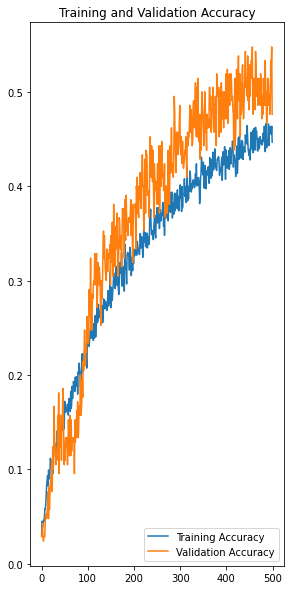

In [11]:
acc = face_celeb_train.history['accuracy']
val_acc = face_celeb_train.history['val_accuracy']

loss = face_celeb_train.history['loss']
val_loss = face_celeb_train.history['val_loss']
epochs_range=range(500)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [12]:
# Saving model in JSON file 
from tensorflow.keras.models import model_from_json
model_in_json = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_in_json)

In [13]:
# Loading model from JSON file
model_file = open('model.json','r')
json_model=model_file.read()
model2=model_from_json(json_model)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0